In [28]:
aa_deltaG = { 'A': 1,   # Alanine
             'C': 0.17,  # Cysteine
             'D': -3,    # Aspartic Acid
             'E': -2.6,  # Glutamic Acid
             'F': 2.5,   # Phenylalanine
             'G': 0.67,  # Glycine
             'H': -1.7,  # Histidine
             'I': 3.1,   # Isoleucine
             'K': -4.6,  # Lysine
             'L': 2.2,   # Leucine
             'M': 1.1,   # Methionine
             'N': -2.7,  # Asparagine
             'P': -0.29, # Proline
             'Q': -2.9,  # Glutamine
             'R': -7.5,  # Arginine
             'S': -1.1,  # Serine
             'T': -0.75, # Threonine
             'V': 2.3,   # Valine
             'W': 1.5,   # Tryptophan
             'Y': 0.08 } # Tyrosine

In [29]:
#Problema 1
#protein = "ACDEF..."
#estructura = "INSWWE"
#res = (0,0)=["A","C"], (0,1)="B"
#Asumimos que protein y structure tienen la misma longitud y solo se puede hacer un movimiento por proteina.
def get_spatial_dic(protein, structure): 
    
    #Inicializamos el diccionario que devolveremos si no hay solapamientos
    res = dict()
    
    #Las coordenadas por defecto de inicio son (x,y) = 0,0
    afterCords= [0,0]
    
    #Recorremos la cadena de proteinas
    for i in range (0,len(protein)):
        
        #Si la proteina está en delta entonces y la primera proteía es "I" seguimos, en el caso de que no, paramos
        if(protein[i] in aa_deltaG):
            if(i==0 and structure[i]!="I"):
                return dict()
            
            #Si la proteina es la I, como es el caso inicial suponemos que está en 0,0
            if(structure[i] == "I"):
                res[(0,0)]=protein[i]
                
            #En cualquier otro caso
            else:
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
                if(structure[i]=="N"):
                    afterCords= [afterCords[0],afterCords[1]+1]
                    newCords = tuple(afterCords)
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
                elif(structure[i]=="S"):
                    afterCords= [afterCords[0],afterCords[1]-1]
                    newCords = tuple(afterCords)
                    
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
                elif(structure[i]=="E"):
                    afterCords= [afterCords[0]+1,afterCords[1]]
                    newCords = tuple(afterCords)
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
                elif(structure[i]=="W"):
                    afterCords= [afterCords[0]-1,afterCords[1]]
                    newCords = tuple(afterCords)
                    
                #En el caso de que las nuevas coordenadas no estén el diccionario las añadimos, en el caso de que estén,
                #Significa que existe solapamiento, por tanto devolvemos uno vacío
                if(newCords not in res):
                    res[newCords]=protein[i]
                else:
                    return dict()
        else:
            return dict()
    return res

        

In [30]:
get_spatial_dic("ACDEF","IWNNN")

{(0, 0): 'A', (-1, 0): 'C', (-1, 1): 'D', (-1, 2): 'E', (-1, 3): 'F'}

In [31]:
# Problema 2.1
# input: aa "aminoacid" ej: "A", "C", "D",
# output: True (hidrophobic) or false (hidrophilic)

def is_hidrofobic(aa):
    hidrophobic_limit = -1.5

    return aa_deltaG[aa] > hidrophobic_limit

In [32]:
print(is_hidrofobic('A'))
print(is_hidrofobic('D'))
print(is_hidrofobic('S'))        

True
False
True


In [33]:
# Problema 2.2
# input: 
#    dic "dictionary that represents 2d structure of the protein" ej: {(0,0): A, (0,1): D ... }
# output: score

def get_N(dic, coords):
    res = 0
    x = coords[0]
    y = coords[1]
    
    if ((x+1, y) not in dic):
        res+=1
    if ((x, y+1) not in dic):
        res+=1
    if ((x-1, y) not in dic):
        res+=1
    if ((x, y-1) not in dic):
        res+=1
        
    return res

def get_score(dic):
    res = 0
    for coords in dic:
        
        aminoacid = dic[coords]
        N = get_N(dic,coords)
        
        res += aa_deltaG[aminoacid] * N
        if is_hidrofobic(aminoacid):
            res += 10 * N
    return res

In [34]:
get_score({(0,0): "A", (0,1): "D"})

24

In [35]:
def get_coords(structure):
     #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
    afterCords= (0,0)
    coords = list()
    coords.append(afterCords)
    
    #Cambiar
    for i in range (1,len(structure)):
        if(structure[i]=="N"):
            afterCords= [afterCords[0],afterCords[1]+1]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
        elif(structure[i]=="S"):
            afterCords= [afterCords[0],afterCords[1]-1]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
        elif(structure[i]=="E"):
            afterCords= [afterCords[0]+1,afterCords[1]]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
        elif(structure[i]=="W"):
            afterCords= [afterCords[0]-1,afterCords[1]]
            newCords = tuple(afterCords)
        coords.append(newCords)
    return coords

In [36]:
get_coords("INNW")

[(0, 0), (0, 1), (0, 2), (-1, 2)]

In [43]:
# Ejercicio 3


def fold_backwards(direction):
    if direction == "N":
        return "W"
    elif direction == "W":
        return "S"
    elif direction == "S":
        return "E"
    elif direction == "E":
        return "N"
    else:
        return direction
    
def fold_forwards(direction):
    if direction == "N":
        return "E"
    elif direction == "W":
        return "N"
    elif direction == "S":
        return "W"
    elif direction == "E":
        return "S"
    else:
        return direction
    
def fold(structure, pos, angle):
    coords = get_coords(structure)
    
    res = ""
    folding = False
    for i in range(0, len(coords)):
        coord = coords[i]
        direction = structure[i]
        
        if folding:
            if angle == 90:
                res += fold_backwards(direction)
            if angle == -90:
                res += fold_forwards(direction)
        else:
            res+= direction
            
        if coord == pos:
            folding = True
            
    return res        

In [44]:
fold("INNW", (0,1), 90)

'INWS'

In [45]:
fold("INNW", (0,1), -90)

'INEN'

In [80]:
# Ejercicio 3.2

def get_successors(protein, structure):
    coords = get_coords(structure)
    
    if len(protein) != len(structure):
        return {}
    
    res = {}
    for coord in coords:
        folded_backwards = fold(structure, coord, 90)
        folded_forwards = fold(structure, coord, -90)
        
        backwards_dic = get_spatial_dic(protein, folded_backwards)
        forwards_dic = get_spatial_dic(protein, folded_forwards)
        
        print(backwards_dic)
        print(forwards_dic)
        
        if backwards_dic:
            res[folded_backwards] = backwards_dic
            
        if forwards_dic:
            res[folded_forwards] = forwards_dic
            
    return res

In [84]:
get_successors("ADADDDD", "INWSWNE")

{}
{}
{}
{}
{}
{}
{(0, 0): 'A', (0, 1): 'D', (-1, 1): 'A', (-1, 0): 'D', (-1, -1): 'D', (-2, -1): 'D', (-2, 0): 'D'}
{}
{(0, 0): 'A', (0, 1): 'D', (-1, 1): 'A', (-1, 0): 'D', (-2, 0): 'D', (-3, 0): 'D', (-3, 1): 'D'}
{}
{(0, 0): 'A', (0, 1): 'D', (-1, 1): 'A', (-1, 0): 'D', (-2, 0): 'D', (-2, 1): 'D', (-2, 2): 'D'}
{}
{}
{}


{'INWSSWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-1, -1): 'D',
  (-2, -1): 'D',
  (-2, 0): 'D'},
 'INWSWWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-3, 0): 'D',
  (-3, 1): 'D'},
 'INWSWNN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-2, 1): 'D',
  (-2, 2): 'D'}}

[[0, 0], [0, 1], [0, 2], [-1, 2]]


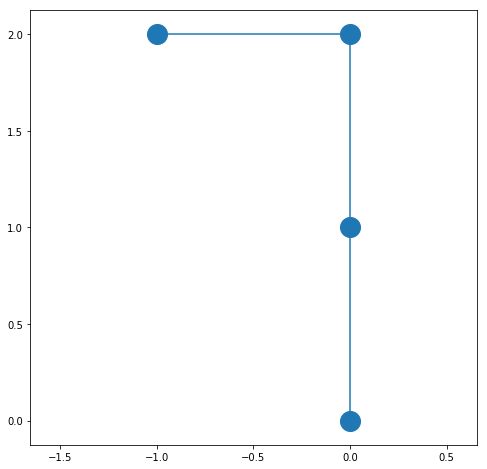

In [103]:
# Ejercicio 5.2

import matplotlib.pyplot as plt

# data = get_coords("INNW")

data = [[0, 0], [0, 1], [0, 2], [-1, 2]]

print(data)

x, y = zip(*data)

fig = plt.figure(figsize=(8, 8))
plt.scatter(x, y, 400)
plt.plot(x, y)
plt.axis("equal")
plt.show()